In [1]:
# Importing libraries

import cv2, glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print('Done Importing!')

Done Importing!


In [2]:
# Setting Paths

symp_path='Data/256_crop_symptoms'
nosymp_path='Data/256_crop_nosymptoms'

# Getting info about dataset

image_names=glob.glob(symp_path+"/*.tiff")+glob.glob(nosymp_path+"/*.tiff")
symp_no = len(glob.glob(symp_path+"/*.tiff"))
nosymp_no = len(glob.glob(nosymp_path+"/*.tiff"))
total_images=len(image_names)
print('Total number of images having symptoms of DR:',symp_no)
print('Total number of images having no symptoms of DR:',nosymp_no)
print('Total number of images:',total_images)

Total number of images having symptoms of DR: 595
Total number of images having no symptoms of DR: 1468
Total number of images: 2063


Image: Data/256_crop_symptoms/Data/256_crop_symptoms\11057_left.tiff


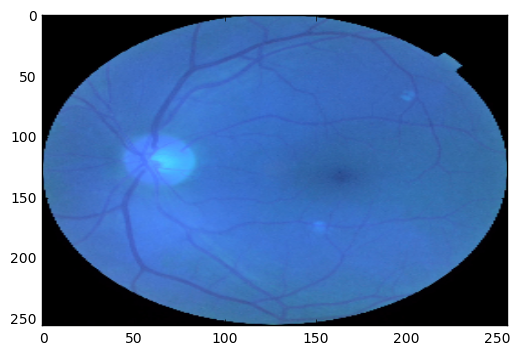

Shape:  (256, 256, 3)
Dataset shape:  (2063, 256, 256, 3)


In [3]:
# Printing a random image

rand = np.random.randint(symp_no)
rand_img_name=symp_path+'/'+image_names[rand]
print('Image:',rand_img_name)
x=cv2.imread(image_names[rand])
plt.imshow(x,aspect='auto')
plt.show()

# Adding images in matrix
img_r,img_c,no_channels=x.shape
print('Shape: ',x.shape)
X=np.ndarray(shape=(total_images,img_r,img_c,no_channels))
for index,image_name in enumerate(image_names):
    X[index,:,:,:] = cv2.imread(image_names[index])
print('Dataset shape: ',X.shape)

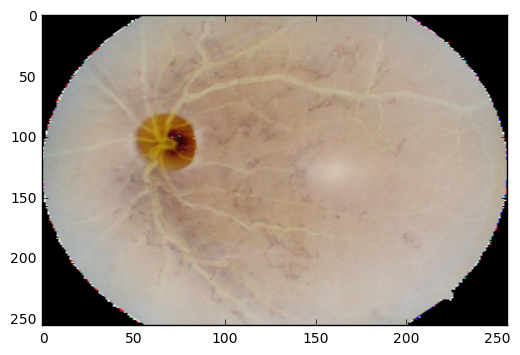

In [4]:
Y=np.zeros(total_images)
Y[0:symp_no]=1
# 1 --> symptoms
# 2 --> no symptoms
plt.imshow(X[np.random.randint(255)],aspect='auto')
plt.show()
# print(X)

In [5]:
def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    print('######',labels.shape[0])
    shuffled_dataset = dataset[permutation]
    del dataset
    shuffled_labels = labels[permutation]
    del labels
    return shuffled_dataset, shuffled_labels

import psutil
print(psutil.virtual_memory())

svmem(total=8476975104, available=2838073344, percent=66.5, used=5638901760, free=2838073344)


In [6]:
shuffled_X,shuffled_Y=randomize(X,Y)

###### 2063


svmem(total=8476975104, available=3590115328, percent=57.6, used=4886859776, free=3590115328)


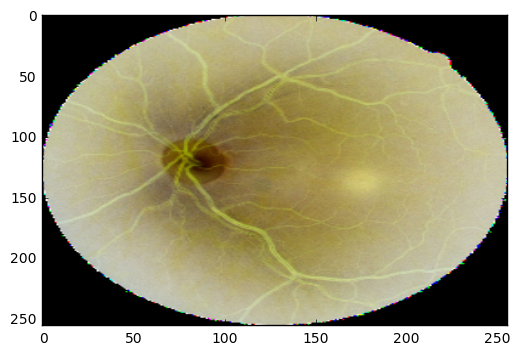

In [7]:
train_X=shuffled_X[:1562]
train_Y=shuffled_Y[:1562]

val_X=shuffled_X[1563:1563+250]
val_Y=shuffled_Y[1563:1563+250]

test_X=shuffled_X[1563+250:]
test_Y=shuffled_Y[1563+250:]

del shuffled_X,shuffled_Y

print(psutil.virtual_memory())
plt.imshow(test_X[0],aspect='auto')
plt.show()
del X,Y

In [8]:
print('Train shape: ',train_X.shape,'Train Labels',train_Y.shape)
print('Dev shape: ',val_X.shape,'Dev Labels',val_Y.shape)
print('Test shape: ',test_X.shape,'Test Labels',test_Y.shape)

Train shape:  (1562, 256, 256, 3) Train Labels (1562,)
Dev shape:  (250, 256, 256, 3) Dev Labels (250,)
Test shape:  (250, 256, 256, 3) Test Labels (250,)


In [10]:
import pickle

# trX=open('train_X','wb')
# pickle.dump(train_X,trX,pickle.HIGHEST_PROTOCOL)
# trX.close()

dX=open('dev_X','wb')
pickle.dump(val_X,dX,pickle.HIGHEST_PROTOCOL)
dX.close()

tsX=open('test_X','wb')
pickle.dump(test_X,tsX,pickle.HIGHEST_PROTOCOL)
tsX.close()

trY=open('train_Y','wb')
pickle.dump(train_Y,trY,pickle.HIGHEST_PROTOCOL)
trY.close()

dY=open('dev_Y','wb')
pickle.dump(val_Y,dY,pickle.HIGHEST_PROTOCOL)
dY.close()

tsY=open('test_Y','wb')
pickle.dump(test_Y,tsY,pickle.HIGHEST_PROTOCOL)
tsY.close()

print(psutil.virtual_memory())

svmem(total=8476975104, available=5207646208, percent=38.6, used=3269328896, free=5207646208)


In [2]:
import pickle
def load(files):
    f=open(files,'rb')
    x=pickle.load(f)
    f.close()
    return x

train_X=load('train_X')
test_X=load('test_X')
val_X=load('dev_X')
train_Y=load('train_Y')
test_Y=load('test_Y')
val_Y=load('dev_Y')

print('Train shape: ',train_X.shape,'Train Labels',train_Y.shape)
print('Dev shape: ',val_X.shape,'Dev Labels',val_Y.shape)
print('Test shape: ',test_X.shape,'Test Labels',test_Y.shape)

Train shape:  (1562, 256, 256, 3) Train Labels (1562,)
Dev shape:  (250, 256, 256, 3) Dev Labels (250,)
Test shape:  (250, 256, 256, 3) Test Labels (250,)


In [3]:
#Flattening the datasets
def flatten(X):
    return X.reshape(X.shape[0],-1).T

train_X=flatten(train_X)
val_X=flatten(val_X)
test_X=flatten(test_X)

train_Y=flatten(train_Y)
val_Y=flatten(val_Y)
test_Y=flatten(test_Y)


In [4]:
print('Train shape: ',train_X.shape,'Train Labels',train_Y.shape)
print('Dev shape: ',val_X.shape,'Dev Labels',val_Y.shape)
print('Test shape: ',test_X.shape,'Test Labels',test_Y.shape)

Train shape:  (196608, 1562) Train Labels (1, 1562)
Dev shape:  (196608, 250) Dev Labels (1, 250)
Test shape:  (196608, 250) Test Labels (1, 250)


In [5]:
#Augmentation

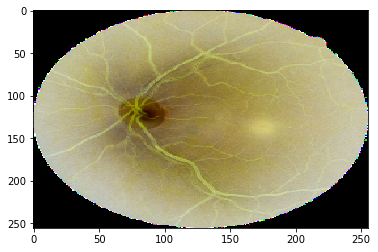

In [6]:
# print(test_X.reshape(250,256,256,3)[33][1])
plt.imshow(test_X.T.reshape(250,256,256,3)[0],aspect='auto')
plt.show()

In [7]:
def cost(logits,labels):
    z = tf.placeholder(tf.float32, name="z")
    y = tf.placeholder(tf.float32, name="y")
    
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=y)
    
    sess = tf.Session()
    
    cost = sess.run(cost, feed_dict={z: logits, y: labels})
    
    sess.close()
    
    return cost

In [8]:
#TESTER
def sigmoid(z):
    
    x = tf.placeholder(tf.float32, name="x")

    sigmoid = tf.sigmoid(x)

    with tf.Session() as sess: 
        result = result = sess.run(sigmoid, feed_dict = {x: z})
        
    return result
logits = sigmoid(np.array([0.2, 0.4, 0.7, 0.9]))
cost = cost(logits, np.array([0, 0, 1, 1]))
print ("cost = " + str(cost))

cost = [ 1.00538719  1.03664088  0.41385433  0.39956614]


In [9]:
def one_hot_matrix(labels, C):
    C = tf.constant(C, name='C')
    one_hot_matrix = tf.one_hot(indices=labels, depth=C, axis=0)
    sess = tf.Session()
    one_hot = sess.run(one_hot_matrix)
    sess.close()
    return one_hot

In [10]:
#TESTER
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C=4)
print ("one_hot = " + str(one_hot))

one_hot = [[ 0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.]]


In [11]:
def ones(shape):
    """
    Creates an array of ones of dimension shape
    
    Arguments:
    shape -- shape of the array you want to create
        
    Returns: 
    ones -- array containing only ones
    """
    
    ### START CODE HERE ###
    
    # Create "ones" tensor using tf.ones(...). (approx. 1 line)
    ones = tf.ones(shape)
    
    # Create the session (approx. 1 line)
    sess = tf.Session()
    
    # Run the session to compute 'ones' (approx. 1 line)
    ones = sess.run(ones)
    
    # Close the session (approx. 1 line). See method 1 above.
    sess.close()
    
    ### END CODE HERE ###
    return ones

In [12]:
train_X/=255
val_X/=255
test_X/=255
train_Y=one_hot_matrix(train_Y, 2)
test_Y=one_hot_matrix(test_Y, 2)
val_Y=one_hot_matrix(val_Y, 2)

print("One-Hot Train_Y shape: ",train_Y.shape)
print("One-Hot Test_Y shape: ",test_Y.shape)
print("One-Hot Val_Y shape: ",val_Y.shape)

One-Hot Train_Y shape:  (2, 1, 1562)
One-Hot Test_Y shape:  (2, 1, 250)
One-Hot Val_Y shape:  (2, 1, 250)


In [13]:
# delete after

f=open('train_Y','rb')
trainY=pickle.load(f)
f.close()

f=open('test_Y','rb')
testY=pickle.load(f)
f.close()

print(trainY.shape)
tY=one_hot_matrix(trainY, 2)
tsY=one_hot_matrix(testY,2)
print(tY.shape)
train_Y=tY
test_Y=tsY
print(train_Y.shape,test_Y.shape)

(1562,)
(2, 1562)
(2, 1562) (2, 250)


In [14]:
def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 196608]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [2, 12]
                        b3 : [2, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    tf.set_random_seed(1)                   # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 6 lines of code)
    W1 = tf.get_variable("W1", [25, 196608], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1", [25, 1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12, 25], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2", [12, 1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [2, 12], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3", [2, 1], initializer = tf.zeros_initializer())
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [15]:
#TESTER
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(25, 196608) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


In [16]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    ### START CODE HERE ### (approx. 5 lines)              # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                     # Z3 = np.dot(W3,Z2) + b3
    ### END CODE HERE ###
    
    return Z3

In [17]:
#TESTER

tf.reset_default_graph()
def create_placeholders(n_x, n_y):
    
    X = tf.placeholder(tf.float32, [n_x, None], name="X")
    Y = tf.placeholder(tf.float32, [n_y, None], name="Y")
    
    return X, Y
with tf.Session() as sess:
    X, Y = create_placeholders(196608, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(2, ?), dtype=float32)


In [34]:
def random_mini_batches(X, Y, mini_batch_size , seed):
    """
    Creates a list of random minibatches from (X, Y)

    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer

    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """

    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []

    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[:, k * mini_batch_size : (k+1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : (k+1) * mini_batch_size]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches

def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 10, minibatch_size = 1, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    

    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    ### START CODE HERE ### (1 line)
    X, Y = create_placeholders(n_x, n_y)
    ### END CODE HERE ###
    
    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters = initialize_parameters()
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    Z3 = forward_propagation(X, parameters)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost(Z3, Y)
    ### END CODE HERE ###
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    ### START CODE HERE ### (1 line)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    ### END CODE HERE ###
    
    # Initialize all the variables
    init = tf.global_variables_initializer()
    
    print('Starting the main session:\n')
    # Start the session to compute the tensorflow graph
    
    saver = tf.train.Saver()
    
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        print('Initialization done!\n')
        
        # Do the training loop
        for epoch in range(num_epochs):
            print('Starting Epoch!\n')
            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
#             print('####',X_train.shape)
            minibatches =[(X_train.T[i],Y_train.T[i]) for i in range(len(Y_train))] #random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                print('###',minibatch_Y.shape)
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: X_train, Y: Y_train})
                ### END CODE HERE ###
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
            saver.save(sess, './model_iter')
        saver.save(sess, './model_final')
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

Starting the main session:

Initialization done!

Starting Epoch!

### (2,)
### (2,)
Cost after epoch 0: 0.001029
Starting Epoch!

### (2,)
### (2,)
Cost after epoch 1: 0.000735
Starting Epoch!

### (2,)
### (2,)
Cost after epoch 2: 0.000746
Starting Epoch!

### (2,)
### (2,)
Cost after epoch 3: 0.000711
Starting Epoch!

### (2,)
### (2,)
Cost after epoch 4: 0.000706
Starting Epoch!

### (2,)
### (2,)
Cost after epoch 5: 0.000693
Starting Epoch!

### (2,)
### (2,)
Cost after epoch 6: 0.000684
Starting Epoch!

### (2,)
### (2,)
Cost after epoch 7: 0.000675
Starting Epoch!

### (2,)
### (2,)
Cost after epoch 8: 0.000676
Starting Epoch!

### (2,)
### (2,)
Cost after epoch 9: 0.000680


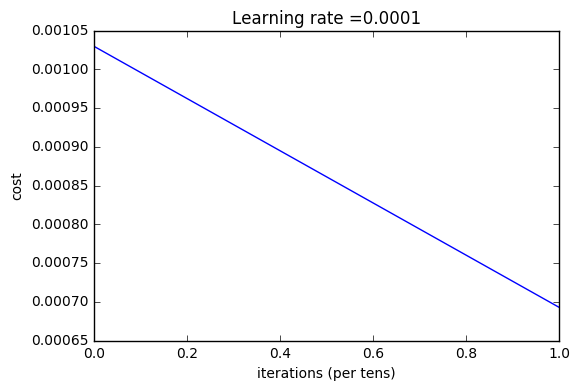

Parameters have been trained!
Train Accuracy: 0.714469
Test Accuracy: 0.724


In [35]:
from tensorflow.python.framework import ops
def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    ### START CODE HERE ### (1 line of code)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
    ### END CODE HERE ###
    
    return cost



parameters = model(train_X, train_Y, test_X, test_Y)